In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import scipy
import seaborn as sns

  

In [22]:
# Прочитаємо дані з файлу
df = pd.read_excel(r'C:\Users\Marharyta\Programming\DataScientist\data_clean.xlsx')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica


In [23]:
# Зробимо опис датафрейму 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2424.000000,2424.000000,2424.000000,2424.000000
mean,6.801846,4.076395,4.735688,2.247149
std,1.034244,0.786511,1.845943,0.985110
min,4.300000,2.000000,1.000000,0.100000
25%,6.060000,3.520000,2.940000,1.520000
50%,6.770000,4.040000,5.100000,2.250319
75%,7.510000,4.590000,6.160000,2.950000
max,10.490000,7.470000,9.040000,5.440000


In [24]:
# Перевіримо чи є в даних пропуски
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [25]:
# Порахуємо кореляцію між усіма стовпчиками
df.corr(numeric_only = True)
# Бачимо, що, sepal_length достатньо сильно корелює з petal_length та petal_width, також petal_length з petal_width,
# в той час як petal_length та sepal_width мають мінімальний коефіціент кореляції (близький до 0)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.290817,0.757080,0.727909
sepal_width,0.290817,1.000000,-0.013035,0.242622
petal_length,0.757080,-0.013035,1.000000,0.812017
petal_width,0.727909,0.242622,0.812017,1.000000


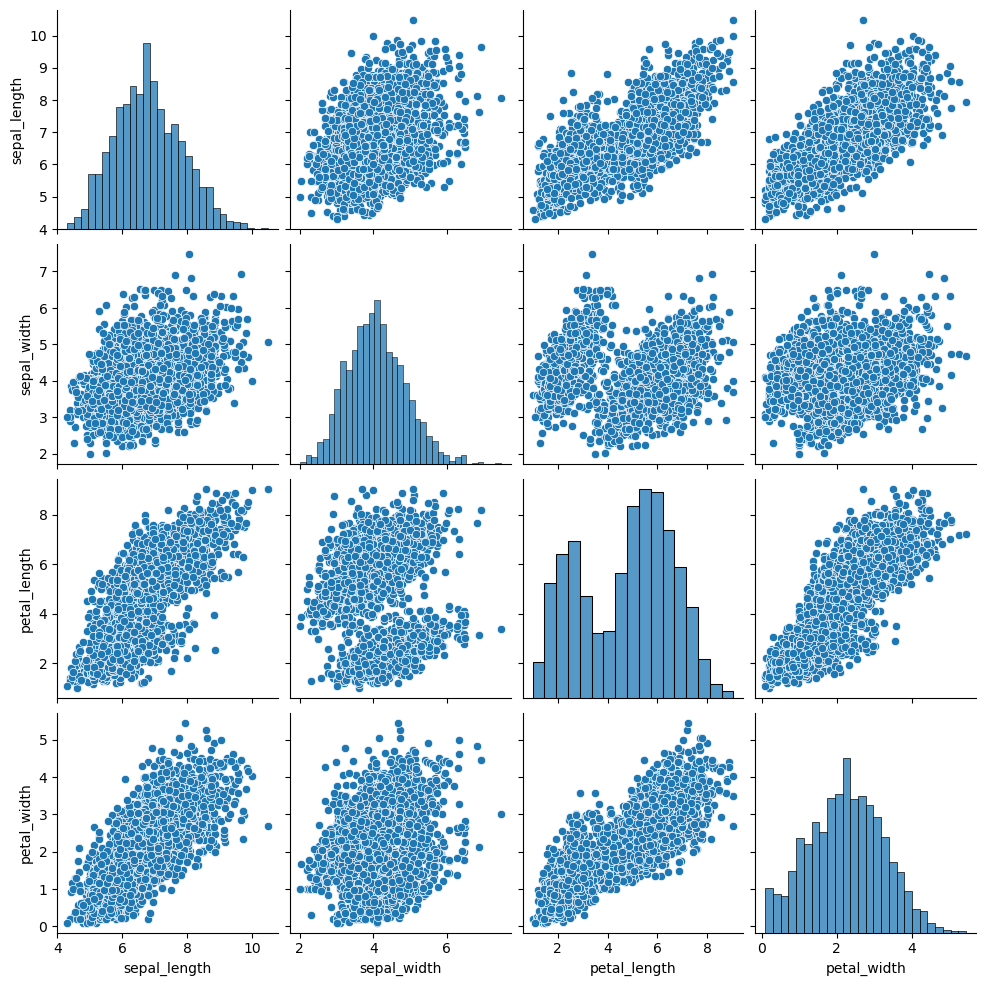

In [26]:
# Побудуємо візуалізацію залежностей між змінними попарно

sns.pairplot(df)
# Можемо за графіками чітко прослідкувати наявність лінійної залежності, яку ми бачили через високий коефіціент кореляції. 
# Наприклад, між sepal_length та petal_length

<Axes: >

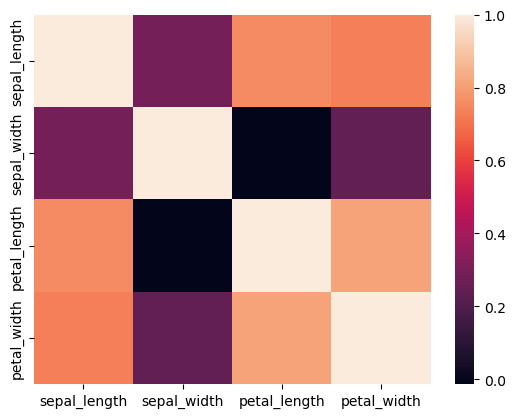

In [27]:
# Побудуємо ще хітмеп, де будуть чим світліші комірки, там сильніша залежність
sns.heatmap(df.corr(numeric_only = True))
# Тут наглядніше стало видно наявність та відсутність залежностей, їх силу. Наприклад, мінімальна залежність між sepal_width та petal_length, та сильна між
# petal_width та petal_length

ShapiroResult(statistic=0.9928569793701172, pvalue=1.6049677142859764e-09)

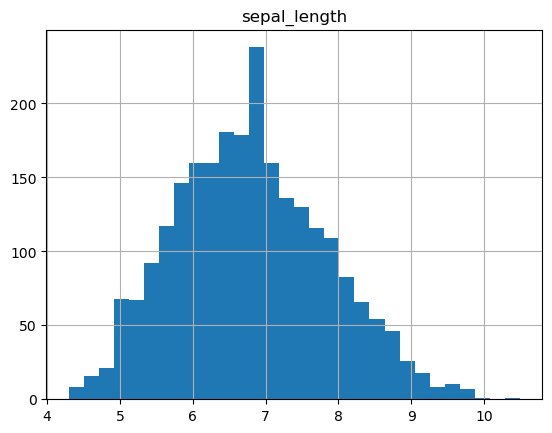

In [28]:
# Побудуємо гістограму частот для кожної характеристики, щоб зрозуміти, чи нормально розподілена ця величина
df.hist(column = 'sepal_length', bins = 30)
# Тут схоже на нормальний розподіл
# Перевіримо чи є він нормальним насправді 

scipy.stats.shapiro(df['sepal_length'])

# pvalue менше за 0,05, тому розподіл насправді не є нормальним 


ShapiroResult(statistic=0.9921618103981018, pvalue=3.6748404319553174e-10)

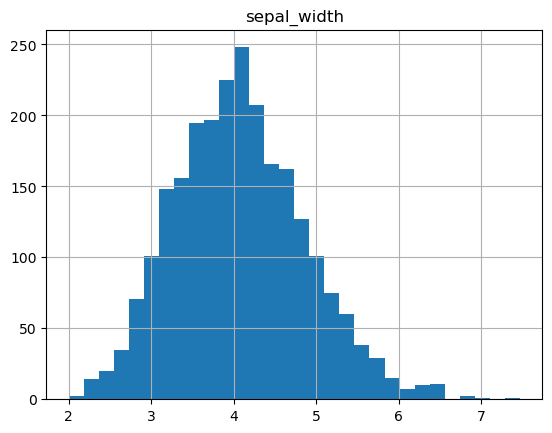

In [29]:
df.hist(column = 'sepal_width', bins = 30)

# Схоже на нормальний розподіл

scipy.stats.shapiro(df['sepal_width'])

# pvalue менше за 0,05, тому розподіл насправді не є нормальним 

ShapiroResult(statistic=0.9553316831588745, pvalue=1.2561850328874547e-26)

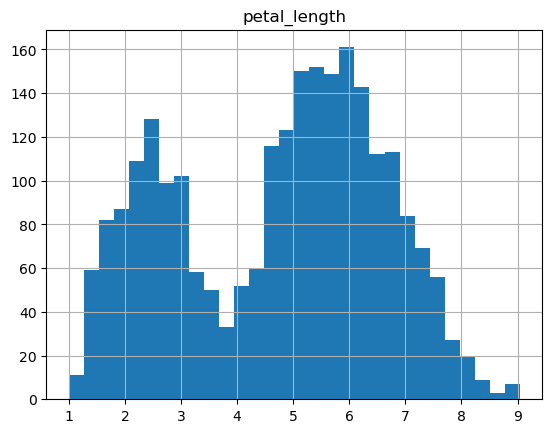

In [30]:
df.hist(column = 'petal_length', bins = 30)
# Цей розподіл не є нормальним, бачимо дві "вершини"

scipy.stats.shapiro(df['petal_length'])

# pvalue менше за 0,05, тому розподіл справді не є нормальним 

ShapiroResult(statistic=0.9942629337310791, pvalue=4.183205248864397e-08)

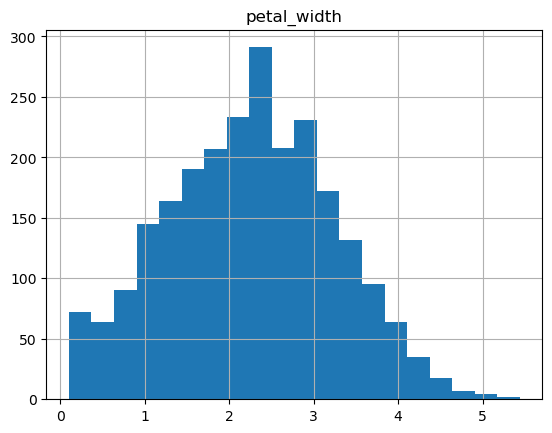

In [31]:
df.hist(column = 'petal_width', bins = 20)
# Тут розподіл схожий на нормальний, але все ж проглядуються можливі другі "вершини"

scipy.stats.shapiro(df['petal_width'])

# pvalue менше за 0,05, тому розподіл справді не є нормальним 
# Отже, жодна зі змінних не розподілена нормально. 


((array([-3.44463932, -3.19713649, -3.06005674, ...,  3.06005674,
          3.19713649,  3.44463932]),
  array([ 4.3 ,  4.4 ,  4.4 , ...,  9.87,  9.99, 10.49])),
 (1.0317929656585472, 6.801846074265932, 0.9965665624469738))

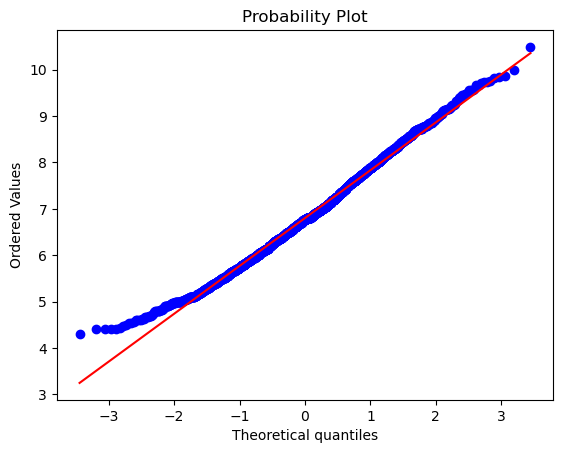

In [37]:
scipy.stats.probplot(df['sepal_length'],plot=pylab)

<Axes: >

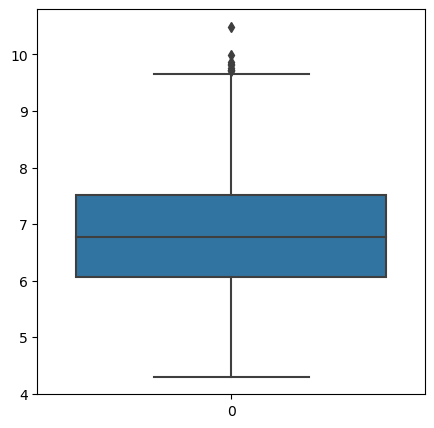

In [32]:
# Побудуємо також додатково boxplot для кожної із змінних, подивимось де зосереджено 50% значень та де знаходяться аутлаєри. 
# Зосередженість половини даних було також добре видно в описі датафрему, це дані між 25 та 75 квартилями. 

plt.figure(figsize = (5,5))
sns.boxplot(df['sepal_length'])




<Axes: >

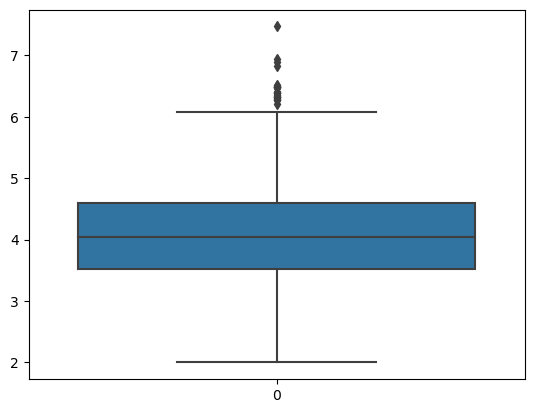

In [33]:
sns.boxplot(df['sepal_width'])

<Axes: >

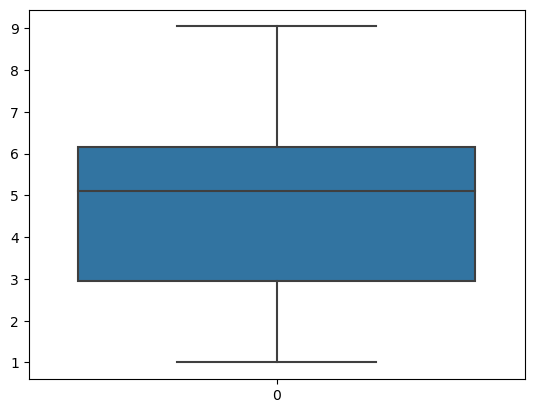

In [34]:
sns.boxplot(df['petal_length'])

<Axes: >

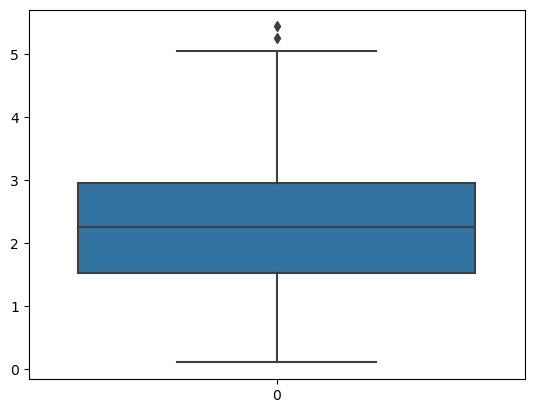

In [35]:
sns.boxplot(df['petal_width'])